In [1]:
# pip install openpyxl
# pip install scikit-learn
# pip install wordcloud

### Import Statements

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Data Cleaning

In [4]:
# List of MBTI types
mbti_types = ["istj", "isfj", "infj", "intj", "istp", "isfp", "infp", "intp",
             "estj", "esfj", "enfj", "entj", "estp", "esfp", "enfp", "entp"]

import csv

# Input CSV file path
# Serene
input_file = r"C:\Users\seren\OneDrive\Documents\datasets_3730\mbti_cleaned.csv"

# Output CSV file path
# Serene
output_file = r"C:\Users\seren\OneDrive\Documents\datasets_3730\output.csv"

# Function to remove MBTI types from a text
def remove_mbti_types(text):
    for mbti_type in mbti_types:
        text = text.replace(mbti_type, "")
    return " ".join(text.split())  # Remove extra spaces

# Read the input CSV file and process it
with open(input_file, 'r', newline='', encoding='utf-8') as csvfile_in, open(output_file, 'w', newline='', encoding='utf-8') as csvfile_out:
    reader = csv.reader(csvfile_in)
    writer = csv.writer(csvfile_out)

    for row in reader:
        if len(row) > 0:  # Ensure the row is not empty
            first_part = row[0]
            first_part_without_mbti = remove_mbti_types(first_part)
            row[0] = first_part_without_mbti
            writer.writerow(row)

print(f'Removed MBTI types from {input_file} and saved the result in {output_file}')


Removed MBTI types from C:\Users\seren\OneDrive\Documents\datasets_3730\mbti_cleaned.csv and saved the result in C:\Users\seren\OneDrive\Documents\datasets_3730\output.csv


In [5]:
# serene
mbti_df = pd.read_csv(r"C:\Users\seren\OneDrive\Documents\datasets_3730\output.csv")

In [6]:
mbti_df.dropna(inplace=True)
mbti_df.isnull().sum(axis=0)

type      0
post1     0
post2     0
post3     0
post4     0
post5     0
post6     0
post7     0
post8     0
post9     0
post10    0
post11    0
post12    0
post13    0
post14    0
post15    0
post16    0
post17    0
post18    0
post19    0
post20    0
post21    0
post22    0
post23    0
post24    0
post25    0
post26    0
post27    0
post28    0
post29    0
post30    0
post31    0
post32    0
post33    0
post34    0
post35    0
post36    0
post37    0
post38    0
post39    0
post40    0
post41    0
post42    0
post43    0
post44    0
post45    0
post46    0
post47    0
post48    0
post49    0
post50    0
dtype: int64

### Data Analysis

In [12]:
mbti_df.shape

(7675, 51)

In [7]:
mbti_df.describe(include=['object'])

,type,post1,post2,post3,post4,post5,post6,post7,post8,post9,...,post41,post42,post43,post44,post45,post46,post47,post48,post49,post50
count,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675,...,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675
unique,16,7666,7665,7663,7665,7666,7657,7658,7667,7665,...,7667,7666,7663,7658,7669,7663,7663,7665,7665,7667
top,INFP,'.,.,.,.,Yes.,.,.,Yes.,Yes.,...,.,...,.,No.,.,.,.,Entp,Isfp,Vocaroo
freq,1648,4,4,5,5,3,6,8,3,4,...,4,5,5,4,3,5,7,3,3,5


In [10]:
mbti_df.head(2)

,type,post1,post2,post3,post4,post5,post6,post7,post8,post9,...,post41,post42,post43,post44,post45,post46,post47,post48,post49,post50
0,INFP,'I used to play a bit of Skyrim (i found it ap...,"Hello, I am a former member of PC. I decided ...",sincere sensations have left my body to aid ot...,i've been told i look like jackson rathbone (t...,this one is of me killing myself slowly with a...,the video is me and my band (i'm the singer cl...,sudden movement crackling noises camp fire jo...,trapped in his own skin he opened his eyes to ...,when your cigarette smoke is inspiration enoug...,...,children redirect your eyes examine your lives...,i see it this way everything tends towards cha...,"yes, i like going to social events to observe ...",lyrics that could be read off of paper like po...,ideal you,real you,Introversion,0.7,73% Extroversion,0.23
1,ENFP,"'Where would you live? Canada/US, somewhere wi...",I'm passively attracted to certain attributes ...,I can be both impatient and stubborn which are...,You're so cute Wait... you're not on drugs? Ca...,I want to console and always be there for a gu...,Never posted in the ENFP section before since ...,There must be something wrong with my personal...,Really got to start posting videos here!! ...,Jeff Buckley! He was such a beautiful human be...,...,Completely over-thinking life right now or am ...,NONE OF MY LISTS ARE IN ANY ORDER 25 Songs yo...,ideal you,real you,Introversion,0.43,73% Extroversion,0.7,40% Intuitive,0.73


In [8]:
# how many MBTIs is being shown
total = mbti_df.groupby(['type']).count()
total

,post1,post2,post3,post4,post5,post6,post7,post8,post9,post10,...,post41,post42,post43,post44,post45,post46,post47,post48,post49,post50
type,,,,,,,,,,,,,,,,,,,,,
ENFJ,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
ENFP,580,580,580,580,580,580,580,580,580,580,...,580,580,580,580,580,580,580,580,580,580
ENTJ,209,209,209,209,209,209,209,209,209,209,...,209,209,209,209,209,209,209,209,209,209
ENTP,610,610,610,610,610,610,610,610,610,610,...,610,610,610,610,610,610,610,610,610,610
ESFJ,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
ESFP,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
ESTJ,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
ESTP,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
INFJ,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,...,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316


### High level Data Visualization

KeyError: 'posts'

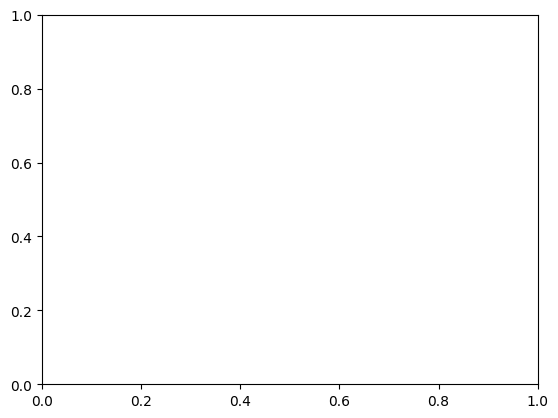

In [9]:
fig, ax = plt.subplots()
ax.bar(np.array(total.index), height = total['posts'], color=(0.9,0.2,0.1,0.8))
plt.xlabel('MBTI Personality Types')
plt.ylabel('Count of the Posts for each type')
plt.title('Total posts for each MBTI Personality Type')
plt.xticks(rotation=90)

In [ ]:
# df = mbti_df.copy()
# #this function counts the no of words in each post of a user
# def var_row(row):
#     l = []
#     for i in row.split('|||'):
#         l.append(len(i.split()))
#     return np.var(l)

# #this function counts the no of words per post out of the total 50 posts in the whole row
# df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
# df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))

# plt.figure(figsize=(15,10))
# sns.swarmplot("type", "words_per_comment", data=df)

C:\Users\seren\AppData\Local\Temp\ipykernel_18672\2820301160.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)


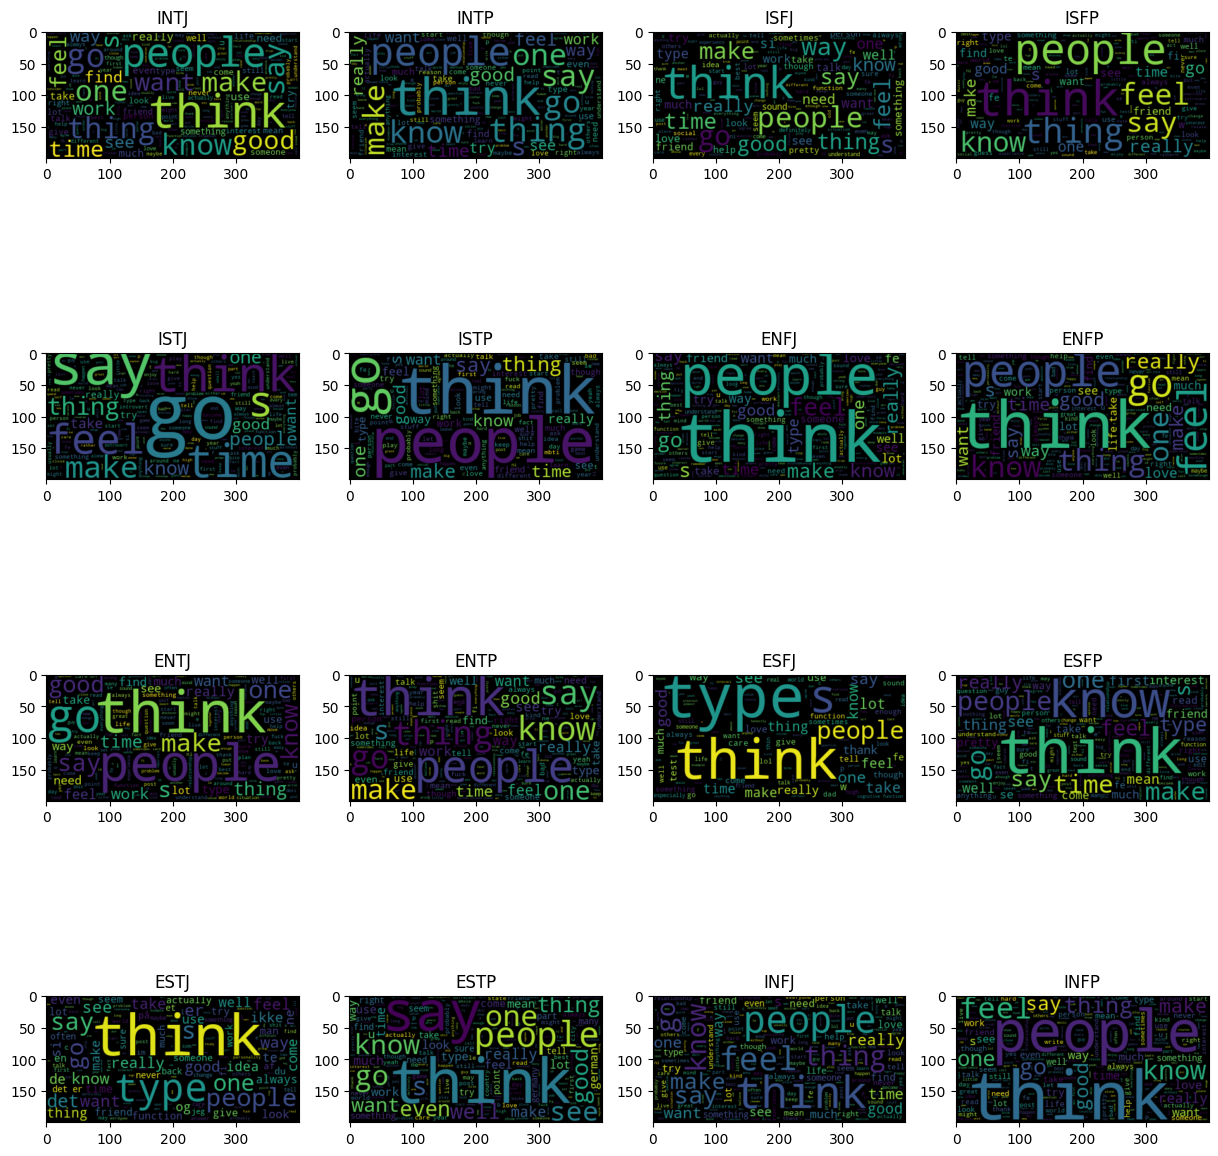

In [ ]:
df = mbti_df.copy()
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [ ]:
# #this function counts the no of words in each post of a user
# def var_row(row):
#     l = []
#     for i in row.split('|||'):
#         l.append(len(i.split()))
#     return np.var(l)

# #this function counts the no of words per post out of the total 50 posts in the whole row
# df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
# df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))

# plt.figure(figsize=(15,10))
# sns.swarmplot(x="type", y="words_per_comment", data=df)

### Vectorization

In [ ]:
# Maybe use TfidfVectorization??

### Apply ML Algorithms

#### 1. Random Tree Classifier